#  Use the 4 months customer call data (April - July 2020) and predict next customer call date and purpose  for August 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import datetime

In [2]:
# Reading the dataset
df=pd.read_csv("calldata.csv")

# Exploratory data analysis (EDA)

In [3]:
df.shape

(700, 5)

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    700 non-null    object
 1   AgentID       700 non-null    object
 2   CallDate      700 non-null    object
 3   CallPurpose   700 non-null    object
 4   Satisfaction  700 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
# Checking the data
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction
0,C0094,A006,6/27/20 8:43 AM,Cannot login,1
1,C0083,A002,6/3/20 8:58 AM,Credit declined,2
2,C0005,A009,5/14/20 8:50 AM,Account Balance,2
3,C0013,A009,6/25/20 9:29 AM,Credit declined,1
4,C0012,A007,5/7/20 9:38 AM,Cannot login,5


In [6]:
# unique customer calling to customer care
df['CustomerID'].nunique()

105

In [7]:
# Nos of Agents handliing the call
df['AgentID'].nunique()

10

A007    130
A008     72
A004     66
A005     66
A009     65
A006     64
A003     61
A002     60
A001     59
A010     57
Name: AgentID, dtype: int64


Text(0.5, 1.0, 'Agent Counts')

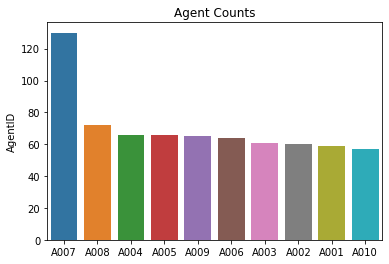

In [8]:
#Nos of volume hnadle by each Agent
print(df['AgentID'].value_counts())
sns.barplot(x=df['AgentID'].value_counts().index, y=df['AgentID'].value_counts())
plt.title("Agent Counts")

In [9]:
#To identify is their any specfic agent that specfic purpose call only
df.groupby(['AgentID','CallPurpose']).count()

CustomerID  CallDate  Satisfaction
AgentID CallPurpose                                        
A001    Account Balance          39        39            39
        Cannot login             20        20            20
A002    Account Balance          39        39            39
        Cannot login             15        15            15
        Credit declined           6         6             6
A003    Account Balance          42        42            42
        Cannot login             16        16            16
        Credit declined           3         3             3
A004    Account Balance          45        45            45
        Cannot login             18        18            18
        Credit declined           3         3             3
A005    Account Balance          45        45            45
        Cannot login             19        19            19
        Credit declined           2         2             2
A006    Account Balance          36        36            36
        Cannot login             24        24            24
        Credit declined           4         4             4
A007    Account Balance          63        63            63
        Cannot login             65        65            65
        Credit declined           2         2             2
A008    Account Balance          52        52            52
        Cannot login             17        17            17
        Credit declined           3         3             3
A009    Account Balance          48        48            48
        Cannot login             11        11            11
        Credit declined           6         6             6
A010    Account Balance          35        35            35
        Cannot login             22        22            22

A007    130
A008     72
A004     66
A005     66
A009     65
A006     64
A003     61
A002     60
A001     59
A010     57
Name: AgentID, dtype: int64


Text(0.5, 1.0, 'Agent Counts')

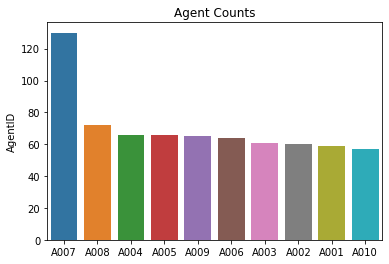

In [10]:
#Nos of volume hnadle by each Agent
print(df['AgentID'].value_counts())
sns.barplot(x=df['AgentID'].value_counts().index, y=df['AgentID'].value_counts())
plt.title("Agent Counts")

Text(0.5, 1.0, 'Purpose Count')

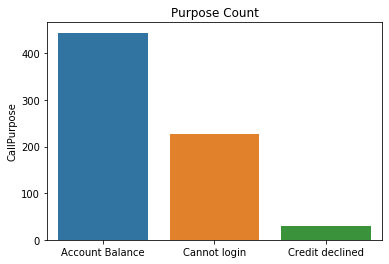

In [11]:
# Frequency of each purpose recevied by customer case
df['CallPurpose'].value_counts()
sns.barplot(x=df['CallPurpose'].value_counts().index, y=df['CallPurpose'].value_counts())
plt.title("Purpose Count")

In [12]:
# Probabilty of each call Purpose 
df['CallPurpose'].value_counts(normalize=True)

Account Balance    0.634286
Cannot login       0.324286
Credit declined    0.041429
Name: CallPurpose, dtype: float64

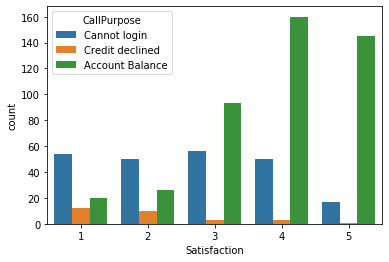

In [13]:
# Staisfication level on each pupose 
sns.countplot(df['Satisfaction'],hue=df['CallPurpose'])
# Credit Decline mostly disatsfied customer 
# Cannot Login is average staisfied customer 
# Account Balance is most satisfied customer from the data set

In [14]:
# Converting to calldate in correct date time format
df["CallDate"]=pd.to_datetime(df["CallDate"])

In [15]:
df.sort_values(['CustomerID','CallDate'])

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5
...,...,...,...,...,...
430,C0105,A001,2020-04-06 08:48:00,Account Balance,5
411,C0105,A005,2020-06-02 08:40:00,Account Balance,5
38,C0105,A007,2020-06-11 09:33:00,Cannot login,1
453,C0105,A009,2020-06-19 09:12:00,Account Balance,4


In [16]:
#Data Prepration to identify the Purpose Analysis when customer call for first time
df.sort_values(['CustomerID','CallDate'],inplace=True)
df['first_call_customer'] = df.groupby(['CustomerID'])['CallDate'].shift(1)
df['first_call_customer'].fillna("0", inplace=True)
dfnew =df[df['first_call_customer']== '0']

Account Balance    68
Cannot login       34
Credit declined     3
Name: CallPurpose, dtype: int64


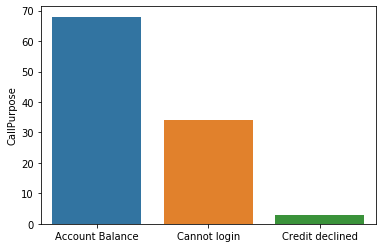

In [17]:
#Purpose Analysis when customer call for first time 
print(dfnew['CallPurpose'].value_counts())
sns.barplot(x=dfnew['CallPurpose'].value_counts().index,y=dfnew['CallPurpose'].value_counts())

In [18]:
# Converting date and time into week, day , weekday, month and  Time foe analysis
df['Week'] = pd.to_datetime(df['CallDate']).dt.week
df['Day'] = pd.to_datetime(df['CallDate']).dt.day
df['WeekDay'] = pd.to_datetime(df['CallDate']).dt.dayofweek
df['Month'] = pd.to_datetime(df['CallDate']).dt.month
df['Time'] = pd.to_datetime(df['CallDate']).dt.time

In [19]:
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00


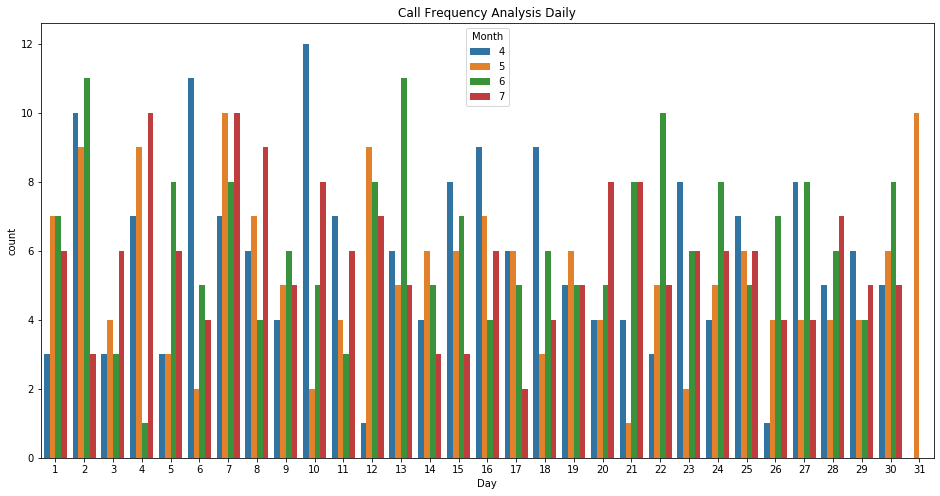

In [20]:
# Call per day analysis for each month
plt.figure(figsize = (16,8))
plt.title("Call Frequency Analysis Daily")
sns.countplot(df['Day'],hue=df['Month'])

Month
4    176
5    165
6    187
7    172
Name: Satisfaction, dtype: int64


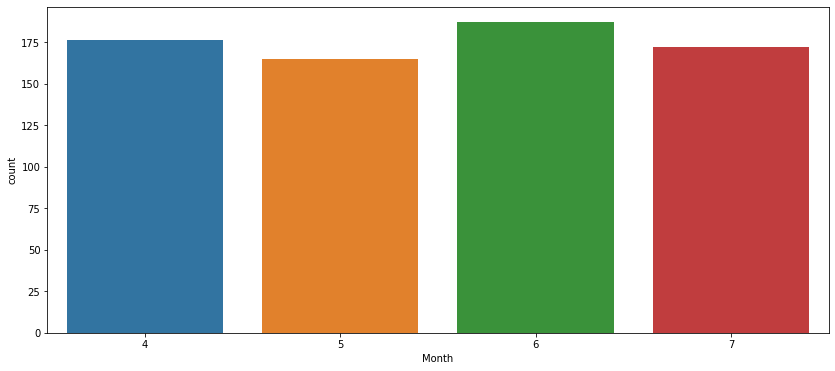

In [21]:
# Per month day analysis
plt.figure(figsize = (14,6))
print(df.groupby('Month').count()['Satisfaction'])
sns.countplot(df['Month'])

In [22]:
# Average call handle by each month
print("Average call handle by each month" , df['Month'].value_counts().values.mean())

Average call handle by each month 175.0


In [23]:
#To check the pattern by observing some sample how much customer call for each month and frequency of each month 
df.groupby(['CustomerID','Month']).count()['CallDate'].head(40)

CustomerID  Month
C0001       4        2
            6        1
            7        1
C0002       5        2
            7        4
C0003       4        1
            5        2
            6        2
C0004       4        3
            5        2
            6        3
            7        2
C0005       4        1
            5        4
            6        3
            7        1
C0006       4        1
            5        2
            6        4
            7        1
C0007       5        1
            6        5
            7        3
C0008       4        1
            6        1
            7        1
C0009       4        4
            5        1
            6        1
            7        1
C0010       4        1
            5        1
            6        3
C0011       5        1
            7        2
C0012       4        2
            5        3
            6        1
C0013       4        5
            5        1
Name: CallDate, dtype: int64

# Model Building 

# Approach
1. To predict next customer call date 
Features:
    - Days between current vs previous call day
    - Days since user called first
    - satisfaction
    - can have agent as on-hot coded feature also
    
Target:
    days from previous or first call

2. To predict next customer call Purpose:

Features:
    - Customer ID
    - Agent ID
    - Staisfaction Level
    
Target:
 Purpose of next call
 

# Data Prepration

There are a number of preprocessing steps we need to do before building the model

In [24]:
# Data Prepration for model - Sorting value as per the customer ID
df.sort_values(['CustomerID','CallDate'],inplace=True)
df.head(20)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00


In [25]:
df['next_call_date']=df.groupby(['CustomerID'])['CallDate'].shift(1)

In [26]:
df['days_diff']  =(df['CallDate']-df['next_call_date'])/ np.timedelta64(1, 'D')

In [27]:
df['days_from_start'] = df.sort_values(['CustomerID','CallDate']).groupby('CustomerID')['days_diff'].cumsum()

In [28]:
df.head(10)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,NaT,NaN,NaN
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-04-16 09:58:00,3.994444,3.994444
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-04-20 09:50:00,55.987500,59.981944
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,NaT,NaN,NaN
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-05-11 09:14:00,14.027083,14.027083
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00,2020-05-25 09:53:00,43.997222,58.024306
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00,2020-07-08 09:49:00,8.968056,66.992361
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00,2020-07-17 09:03:00,3.011806,70.004167
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,2020-07-20 09:20:00,6.944444,76.948611


In [29]:
df.fillna(0,inplace=True)

In [30]:
df.head(10)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,0,0.000000,0.000000
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-04-16 09:58:00,3.994444,3.994444
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-04-20 09:50:00,55.987500,59.981944
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,0,0.000000,0.000000
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-05-11 09:14:00,14.027083,14.027083
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00,2020-05-25 09:53:00,43.997222,58.024306
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00,2020-07-08 09:49:00,8.968056,66.992361
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00,2020-07-17 09:03:00,3.011806,70.004167
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,2020-07-20 09:20:00,6.944444,76.948611


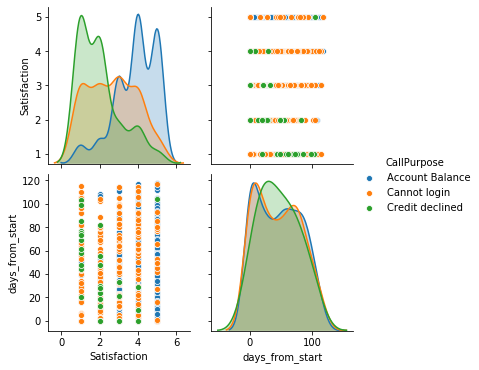

In [31]:
sns.pairplot(df[['Satisfaction','days_from_start','CallPurpose']],hue='CallPurpose')

In [32]:
df[['Satisfaction','days_diff','days_from_start']]

,Satisfaction,days_diff,days_from_start
410,3,0.000000,0.000000
97,3,3.994444,3.994444
316,1,55.987500,59.981944
186,4,30.971528,90.953472
448,5,0.000000,0.000000
...,...,...,...
430,5,0.000000,0.000000
411,5,56.994444,56.994444
38,1,9.036806,66.031250
453,4,7.985417,74.016667


In [33]:
df.reset_index(drop=True,inplace=True)
df

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,0,0.000000,0.000000
1,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-04-16 09:58:00,3.994444,3.994444
2,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-04-20 09:50:00,55.987500,59.981944
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
4,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,C0105,A001,2020-04-06 08:48:00,Account Balance,5,0,15,6,0,4,08:48:00,0,0.000000,0.000000
696,C0105,A005,2020-06-02 08:40:00,Account Balance,5,2020-04-06 08:48:00,23,2,1,6,08:40:00,2020-04-06 08:48:00,56.994444,56.994444
697,C0105,A007,2020-06-11 09:33:00,Cannot login,1,2020-06-02 08:40:00,24,11,3,6,09:33:00,2020-06-02 08:40:00,9.036806,66.031250
698,C0105,A009,2020-06-19 09:12:00,Account Balance,4,2020-06-11 09:33:00,25,19,4,6,09:12:00,2020-06-11 09:33:00,7.985417,74.016667


Firstly, note that we have both categorical and numeric features as predictors.

we need to encode the categorical variables into a standard format so that sklearn can understand them and build the tree. We'll do that using the LabelEncoder() class, which comes with sklearn.preprocessing. 


In [34]:
# apply Label encoder to df_categorical to convert categorical value to numeric
from sklearn import preprocessing
df_categorical = df[['CustomerID','AgentID','CallPurpose']]


le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)

In [35]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'Account Balance': 0, 'Cannot login': 1, 'Credit declined': 2}


In [36]:
df_categorical.shape

(700, 3)

In [37]:
# Apply Label encoder to df_categorical to convert categorical value to numeric.
# Creating dictionary that will be used to map the code input the categorical value
from sklearn import preprocessing
Mapping=[]
df_categorical = df[['CustomerID','AgentID','CallPurpose']]
le = preprocessing.LabelEncoder()
for i in range(0,df_categorical.shape[1]):
        df_categorical[df_categorical.columns[i]] = le.fit_transform(df_categorical[df_categorical.columns[i]])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        Mapping.append(le_name_mapping)

C:\Users\7504468\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
Mapping

[{'C0001': 0,
  'C0002': 1,
  'C0003': 2,
  'C0004': 3,
  'C0005': 4,
  'C0006': 5,
  'C0007': 6,
  'C0008': 7,
  'C0009': 8,
  'C0010': 9,
  'C0011': 10,
  'C0012': 11,
  'C0013': 12,
  'C0014': 13,
  'C0015': 14,
  'C0016': 15,
  'C0017': 16,
  'C0018': 17,
  'C0019': 18,
  'C0020': 19,
  'C0021': 20,
  'C0022': 21,
  'C0023': 22,
  'C0024': 23,
  'C0025': 24,
  'C0026': 25,
  'C0027': 26,
  'C0028': 27,
  'C0029': 28,
  'C0030': 29,
  'C0031': 30,
  'C0032': 31,
  'C0033': 32,
  'C0034': 33,
  'C0035': 34,
  'C0036': 35,
  'C0037': 36,
  'C0038': 37,
  'C0039': 38,
  'C0040': 39,
  'C0041': 40,
  'C0042': 41,
  'C0043': 42,
  'C0044': 43,
  'C0045': 44,
  'C0046': 45,
  'C0047': 46,
  'C0048': 47,
  'C0049': 48,
  'C0050': 49,
  'C0051': 50,
  'C0052': 51,
  'C0053': 52,
  'C0054': 53,
  'C0055': 54,
  'C0056': 55,
  'C0057': 56,
  'C0058': 57,
  'C0059': 58,
  'C0060': 59,
  'C0061': 60,
  'C0062': 61,
  'C0063': 62,
  'C0064': 63,
  'C0065': 64,
  'C0066': 65,
  'C0067': 66,
  'C0

In [39]:
new_df=pd.concat([df_categorical,df['Satisfaction'],df['Month']],axis=1)

In [40]:
# As we want to consider train on the data for the month of May ,June and July - for predicting purpose 
train=new_df[new_df['Month']<7].copy()

In [41]:
# As we want test the data we are considering for the month of August 
test=new_df[new_df['Month']==7].copy()

In [42]:
test.head()

,CustomerID,AgentID,CallPurpose,Satisfaction,Month
3,0,3,0,4,7
6,1,6,1,1,7
7,1,6,1,1,7
8,1,7,0,4,7
9,1,1,1,4,7


In [43]:
# Splitting the data into train and test
X_train=train[['CustomerID','AgentID','Satisfaction']]
X_test=test[['CustomerID','AgentID','Satisfaction']]
y_train=train['CallPurpose']
y_test=test['CallPurpose']

In [44]:
X_train.head()

,CustomerID,AgentID,Satisfaction
0,0,6,3
1,0,0,3
2,0,6,1
4,1,9,5
5,1,6,2


# Model Building :To predict purpose of customer call 

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(X_train, y_train)
    y_pred=lin.predict(X_test)
    lin_r=accuracy_score(y_test, y_pred)
    s.append(lin_r)

In [47]:
#Checking the scores by using our function
algos=[LinearDiscriminantAnalysis,RandomForestClassifier,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression]
s=[]
for i in algos:
    scores(i)

C:\Users\7504468\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearDiscriminantAnalysis','RandomForestClassifier','SVC','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','LogisticRegression'],
    'Score': [s[0],s[1],s[2],s[3],s[4],s[5],s[6]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,LinearDiscriminantAnalysis,0.744186
4,GaussianNB,0.744186
6,LogisticRegression,0.744186
3,KNeighborsClassifier,0.651163
2,SVC,0.645349
1,RandomForestClassifier,0.552326
5,DecisionTreeClassifier,0.488372


In [49]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
# Let's check the evaluation metrics of our default model for train

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dt_default.predict(X_train)

print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))

[[333   0   0]
 [  7 165   0]
 [  2   0  21]]
0.9829545454545454


In [51]:
# Let's check the evaluation metrics of our default model test

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[74 35  2]
 [36 12  7]
 [ 1  5  0]]
0.5


In [52]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.ensemble import RandomForestRegressor

In [53]:
rfg_default = RandomForestRegressor()

In [54]:
rfg_default.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid={'max_depth': range(3,5),'n_estimators': (500, 700),'min_samples_leaf':[5,10,50,100]},
                       cv=5, verbose=5,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_predict(rfr, X, y, cv=10)
    return rfr,scores,best_params

In [56]:
model, score,best_params = rfr_model(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   26.7s finished


In [57]:
best_params

{'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 700}

In [58]:
final_model =  RandomForestClassifier(max_depth=3, n_estimators=500, min_samples_leaf= 50, random_state=False, verbose=False)

In [59]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=False,
                       verbose=False, warm_start=False)

In [60]:
#To avoid name conflict for Final Demo 
final_model_predictpurpose =  RandomForestClassifier(max_depth=3, n_estimators=500, min_samples_leaf= 50, random_state=False, verbose=False)
final_model_predictpurpose.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=False,
                       verbose=False, warm_start=False)

In [61]:
y_pred = final_model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))

[[302  31   0]
 [112  60   0]
 [ 17   6   0]]
0.6856060606060606


# Final Result for Randomforest to predict Purpose

In [62]:
# Let's check the evaluation metrics of our default model test

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = final_model.predict(X_test)

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[107   4   0]
 [ 39  16   0]
 [  4   2   0]]
0.7151162790697675


In [63]:
X_test.head()

,CustomerID,AgentID,Satisfaction
3,0,3,4
6,1,6,1
7,1,6,1
8,1,7,4
9,1,1,4


# Data Pipeline

In [64]:
#Data Pipeline 
#C0003
#customer_id= input("Enter the customer_ID")
Predict_for_Customer='C0003'

In [65]:
check_dataframe=df.sort_values(['CustomerID','CallDate']).groupby(['CustomerID']).tail(1)
check_dataframe.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
9,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,2020-07-20 09:20:00,6.944444,76.948611
14,C0003,A010,2020-06-22 08:43:00,Cannot login,3,2020-06-02 08:46:00,26,22,0,6,08:43:00,2020-06-02 08:46:00,19.997917,60.029167
24,C0004,A004,2020-07-17 08:44:00,Account Balance,4,2020-07-02 09:51:00,29,17,4,7,08:44:00,2020-07-02 09:51:00,14.953472,102.000000
33,C0005,A002,2020-07-26 09:58:00,Account Balance,4,2020-06-22 09:19:00,30,26,6,7,09:58:00,2020-06-22 09:19:00,34.027083,113.057639


In [66]:
satisfaction_value=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['Satisfaction'].values[0]
last_AgentID = check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['AgentID'].values[0]

In [67]:
customer_id=Mapping[0][Predict_for_Customer]
agent_id=Mapping[1][last_AgentID]

In [68]:
passing_datframe=pd.DataFrame(data=[[customer_id,agent_id,satisfaction_value]],columns=['CustomerID','AgentID','Satisfaction'])

In [69]:
passing_datframe

,CustomerID,AgentID,Satisfaction
0,2,9,3


In [70]:
y_pred_default = final_model.predict(passing_datframe)

In [71]:
A=y_pred_default[0]

In [72]:
A

0

In [73]:
def get_key(val): 
    for key, value in Mapping[2].items(): 
         if val == value: 
             return key 

In [74]:
get_key(A)

'Account Balance'

#  Model Building :To predict next customer call 

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [76]:
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,0,0.000000,0.000000
1,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-04-16 09:58:00,3.994444,3.994444
2,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-04-20 09:50:00,55.987500,59.981944
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
4,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,0,0.000000,0.000000


In [77]:
test= df[df.days_from_start>0].copy()
unseen= df[df.days_from_start==0].copy()

In [78]:
unseen.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,0,0.0,0.0
4,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,0,0.0,0.0
10,C0003,A007,2020-04-23 08:01:00,Cannot login,2,0,17,23,3,4,08:01:00,0,0.0,0.0
15,C0004,A004,2020-04-06 08:44:00,Account Balance,4,0,15,6,0,4,08:44:00,0,0.0,0.0
25,C0005,A004,2020-04-04 08:35:00,Account Balance,5,0,14,4,5,4,08:35:00,0,0.0,0.0


In [79]:
features=['Satisfaction','days_diff']
target = ['days_from_start']

In [80]:
X_train,X_test, y_train,y_test = train_test_split(test[['Satisfaction','days_diff']],test['days_from_start'])

In [81]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(X_train, y_train)
    y_pred=lin.predict(X_test)
    lin_r= r2_score(y_test, y_pred)
    s.append(lin_r)

In [82]:
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
    scores(i)

In [83]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,LinearRegression,0.009660
4,DecisionTreeRegressor,0.007047
3,Lasso,0.006642
1,KNeighborsRegressor,-0.140874
2,RandomForestRegressor,-0.301562


In [84]:
clf =LinearRegression() 

In [85]:
#clf.fit(train[features],train[target])
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
clf.score(X_train,y_train)

0.050446383530029726

In [87]:
y_pred= clf.predict(X_test)

In [88]:
clf.score(X_test, y_test)

0.00965966674871388

In [89]:
r2_score(y_test,y_pred)

0.00965966674871388

In [90]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'max_depth': range(3,5),'n_estimators': (500, 700),'min_samples_leaf':[5,10,50,100]},
                       cv=5, verbose=5,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_predict(rfr, X, y, cv=10)
    return rfr,scores,best_params

In [91]:
model, score,best_params = rfr_model(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.2s finished


In [92]:
best_params

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 700}

In [93]:
final_model =  RandomForestRegressor(max_depth=3, n_estimators=700, min_samples_leaf= 100, random_state=False, verbose=False)


In [94]:
final_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [95]:
final_model.predict(X_test)

array([52.81875708, 47.75212138, 52.73311708, 47.84730251, 60.26970501,
       60.32665115, 60.36488614, 60.26970501, 60.36488614, 59.65832318,
       47.84730251, 47.75212138, 52.61201104, 47.84730251, 52.86922117,
       52.9644023 , 60.23147002, 47.84730251, 60.26970501, 47.75212138,
       47.84730251, 47.84730251, 60.36488614, 47.95732604, 52.73311708,
       47.84730251, 52.57781792, 59.70258707, 48.05250717, 52.75478399,
       60.36488614, 47.84730251, 60.23147002, 52.73311708, 60.36488614,
       47.75212138, 47.84730251, 52.74423557, 59.60740594, 60.26970501,
       47.75212138, 60.36488614, 60.26970501, 53.42647786, 60.26970501,
       60.36488614, 60.36488614, 47.84730251, 52.81875708, 59.44382509,
       47.84730251, 47.84730251, 60.36488614, 52.86922117, 52.84996512,
       60.36488614, 52.61201104, 60.26970501, 60.32665115, 58.50476509,
       59.73632134, 52.9644023 , 52.47868173, 47.84730251, 47.84730251,
       47.75212138, 52.61201104, 47.84730251, 47.84730251, 52.98

In [96]:
#To avoid name conflict for Final Demo 
final_model_predictfuturedate =  RandomForestRegressor(max_depth=3, n_estimators=700, min_samples_leaf= 100, random_state=False, verbose=False)
final_model_predictfuturedate.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [97]:
y_pred = final_model.predict(test[features])
r2_score(y_test,final_model.predict(X_test))

0.02015171607489752

In [98]:
prediction_df = df.merge(test,on=None)

In [99]:
prediction_df['future_days_call']=y_pred
prediction_df

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start,future_days_call
0,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-04-16 09:58:00,3.994444,3.994444,47.752121
1,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-04-20 09:50:00,55.987500,59.981944,60.269705
2,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472,60.364886
3,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-05-11 09:14:00,14.027083,14.027083,55.988153
4,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00,2020-05-25 09:53:00,43.997222,58.024306,60.269705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,C0104,A006,2020-07-11 08:43:00,Cannot login,1,2020-06-26 08:23:00,28,11,5,7,08:43:00,2020-06-26 08:23:00,15.013889,62.981944,58.409584
591,C0105,A005,2020-06-02 08:40:00,Account Balance,5,2020-04-06 08:48:00,23,2,1,6,08:40:00,2020-04-06 08:48:00,56.994444,56.994444,60.364886
592,C0105,A007,2020-06-11 09:33:00,Cannot login,1,2020-06-02 08:40:00,24,11,3,6,09:33:00,2020-06-02 08:40:00,9.036806,66.031250,52.733117
593,C0105,A009,2020-06-19 09:12:00,Account Balance,4,2020-06-11 09:33:00,25,19,4,6,09:12:00,2020-06-11 09:33:00,7.985417,74.016667,52.612011


In [100]:
pred2=pd.DataFrame()
pred2['predicted']=final_model.predict(test[features])
pred2['actual']=test[target].values

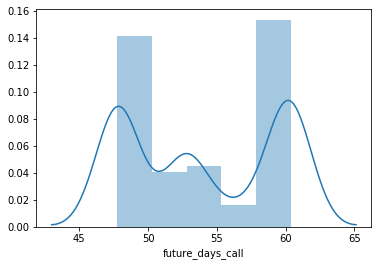

In [101]:
sns.distplot(prediction_df['future_days_call'])

In [102]:
pred2

,predicted,actual
0,47.752121,3.994444
1,60.269705,59.981944
2,60.364886,90.953472
3,55.988153,14.027083
4,60.269705,58.024306
...,...,...
590,58.409584,62.981944
591,60.364886,56.994444
592,52.733117,66.031250
593,52.612011,74.016667


In [103]:
#Data PipeLine for call date Prediction (Testing Purpose)

In [104]:
#Predict_for_Customer= input("Enter the customer ID:  ")
Predict_for_Customer='C0003'

In [105]:
check_dataframe=df.sort_values(['CustomerID','CallDate']).groupby(['CustomerID']).tail(1)

In [106]:
check_dataframe.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,2020-06-15 09:32:00,30.971528,90.953472
9,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,2020-07-20 09:20:00,6.944444,76.948611
14,C0003,A010,2020-06-22 08:43:00,Cannot login,3,2020-06-02 08:46:00,26,22,0,6,08:43:00,2020-06-02 08:46:00,19.997917,60.029167
24,C0004,A004,2020-07-17 08:44:00,Account Balance,4,2020-07-02 09:51:00,29,17,4,7,08:44:00,2020-07-02 09:51:00,14.953472,102.000000
33,C0005,A002,2020-07-26 09:58:00,Account Balance,4,2020-06-22 09:19:00,30,26,6,7,09:58:00,2020-06-22 09:19:00,34.027083,113.057639


In [107]:
day_diff=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['days_diff'].values[0]
satisfaction_value=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['Satisfaction'].values[0]
client_last_call_date = check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['CallDate'].values[0]

In [108]:
passing_datframe=pd.DataFrame(data=[[satisfaction_value,day_diff]],columns=['Satisfaction','days_diff'])

In [109]:
passing_datframe

,Satisfaction,days_diff
0,3,19.997917


In [110]:
y_pred_default = final_model.predict(passing_datframe)

In [111]:
pred_date=y_pred_default[0]

In [112]:
Future_predicted_date=pd.to_datetime(client_last_call_date)+ datetime.timedelta(days=pred_date)

In [113]:
print('Expected call date for the customer is', Future_predicted_date)

Expected call date for the customer is 2020-08-21 15:11:22.513185


# Final Data Pipeline for Demo

In [114]:
#Exception is not yet hnadle for new Cusomter that was not part of trainig data
customer_id= input("Enter the customer_ID  :")

Enter the customer_ID  :C0098


In [115]:
custid=customer_id
check_dataframe=df.sort_values(['CustomerID','CallDate']).groupby(['CustomerID']).tail(1)
day_diff=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['days_diff'].values[0]
satisfaction_value=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['Satisfaction'].values[0]
client_last_call_date = check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['CallDate'].values[0]
passing_datframe_to_predictdate=pd.DataFrame(data=[[satisfaction_value,day_diff]],columns=['Satisfaction','days_diff'])
y_pred_default = final_model_predictfuturedate.predict(passing_datframe_to_predictdate)
Future_predicted_date=pd.to_datetime(client_last_call_date)+ datetime.timedelta(days=y_pred_default[0])
Future_predicted_date=pd.to_datetime(client_last_call_date)+ datetime.timedelta(days=pred_date)
print(f'Last call date for the customer {custid} was', pd.to_datetime(client_last_call_date))
print(f'Expected call date for the customer {custid} is', Future_predicted_date)
check_dataframe=df.sort_values(['CustomerID','CallDate']).groupby(['CustomerID']).tail(1)
satisfaction_value=check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['Satisfaction'].values[0]
last_AgentID = check_dataframe[check_dataframe['CustomerID']==Predict_for_Customer]['AgentID'].values[0]
customer_id=Mapping[0][Predict_for_Customer]
agent_id=Mapping[1][last_AgentID]
passing_datframe_to_predictpurpose=pd.DataFrame(data=[[customer_id,agent_id,satisfaction_value]],columns=['CustomerID','AgentID','Satisfaction'])
y_pred_default = final_model_predictpurpose.predict(passing_datframe_to_predictpurpose)
print(f"Predicted purpose of customer {custid}  is",get_key(y_pred_default[0]))

Last call date for the customer C0098 was 2020-06-22 08:43:00
Expected call date for the customer C0098 is 2020-08-21 15:11:22.513185
Predicted purpose of customer C0098  is Account Balance


Thank you , Any Feedback and Suggestion are appreciated....!!!!